In [1]:
from keras import models
from keras.models import load_model
from setupGenerators import *
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Functions to do plotting

In [2]:
def getTrainPredictions(img,subImgSize,model):
    # get the size of the input image
    l,w,d = np.shape(img)
    # init array for new image
    pred = np.zeros(shape = (l,w))

    r = l//subImgSize[0]
    c = w//subImgSize[1]

    roffset = 0
    coffset = 0
    
    if l%subImgSize[0] != 0:
        roffset = 1
    if w%subImgSize[1] != 0:
        coffset = 1
 
    x1 = 0
    predX1 = 0
    # Crop the image
    for j in range(r + roffset):
        y1 = 0
        predY1 = 0

        x2 = (j+1)*subImgSize[0] 

        if x2 > l:
            x2 = l
            x1 = l - subImgSize[0]
            
        for k in range(c + coffset):
            # find upper bounds of window
            y2 = (k+1)*subImgSize[1] 
            
            # check if outer dimension is larger than image size and adjust

            if y2 > w:
                y2 = w
                y1 = w - subImgSize[1]

            # crop area of picture
            croppedArea = img[x1:x2,y1:y2,:]
            # make prediction using model
            
            modelPrediction = model.predict(np.expand_dims(croppedArea,axis = 0))
            # update prediction image
            pred[predX1:x2,predY1:y2] = modelPrediction[0,(predX1-x1):,(predY1-y1):,0]
            # update the bounds
            y1 = y2
            predY1 = y1 

        # update the lower x bound
        x1 = x2 
        predX1 = x1

    return pred

def setGenerator(params):
    images = os.listdir(params['train_path'] + "/data/")    
    ind = np.random.randint(0,len(images),len(images))  
    
    for i in ind:
        image = io.imread(params['train_path'] + "/data/" + images[i])
        label = io.imread(params['train_path'] + "/label/" + images[i])
        prediction = getTrainPredictions(image,params['shape'],params['model'])
        
        yield(image,prediction,label)
        
        
def plotPredictions(params):
    #initialize figure
    fig, axes = plt.subplots(nrows=params['num_of_img'], ncols=3, figsize=(20, 15))
    # set titles
    axes[0,0].set_title("Original",fontsize = 20)
    axes[0,1].set_title("Prediction",fontsize = 20)
    axes[0,2].set_title("Actual",fontsize = 20)
    
    # load model
    params['model'] = load_model(params['model'])
    
    # initialize generator
    gen = setGenerator(params)
    
    for i, batch in enumerate(gen):
        if(i >= params['num_of_img']):
            break
        else:
            # make plots
            axes[i,0].imshow(batch[0])
            axes[i,0].axis("off")
            axes[i,1].imshow(batch[1])
            axes[i,1].axis("off")
            axes[i,2].imshow(batch[2])
            axes[i,2].axis("off")
            
    fig.tight_layout()
    plt.show()

### Plot predictions

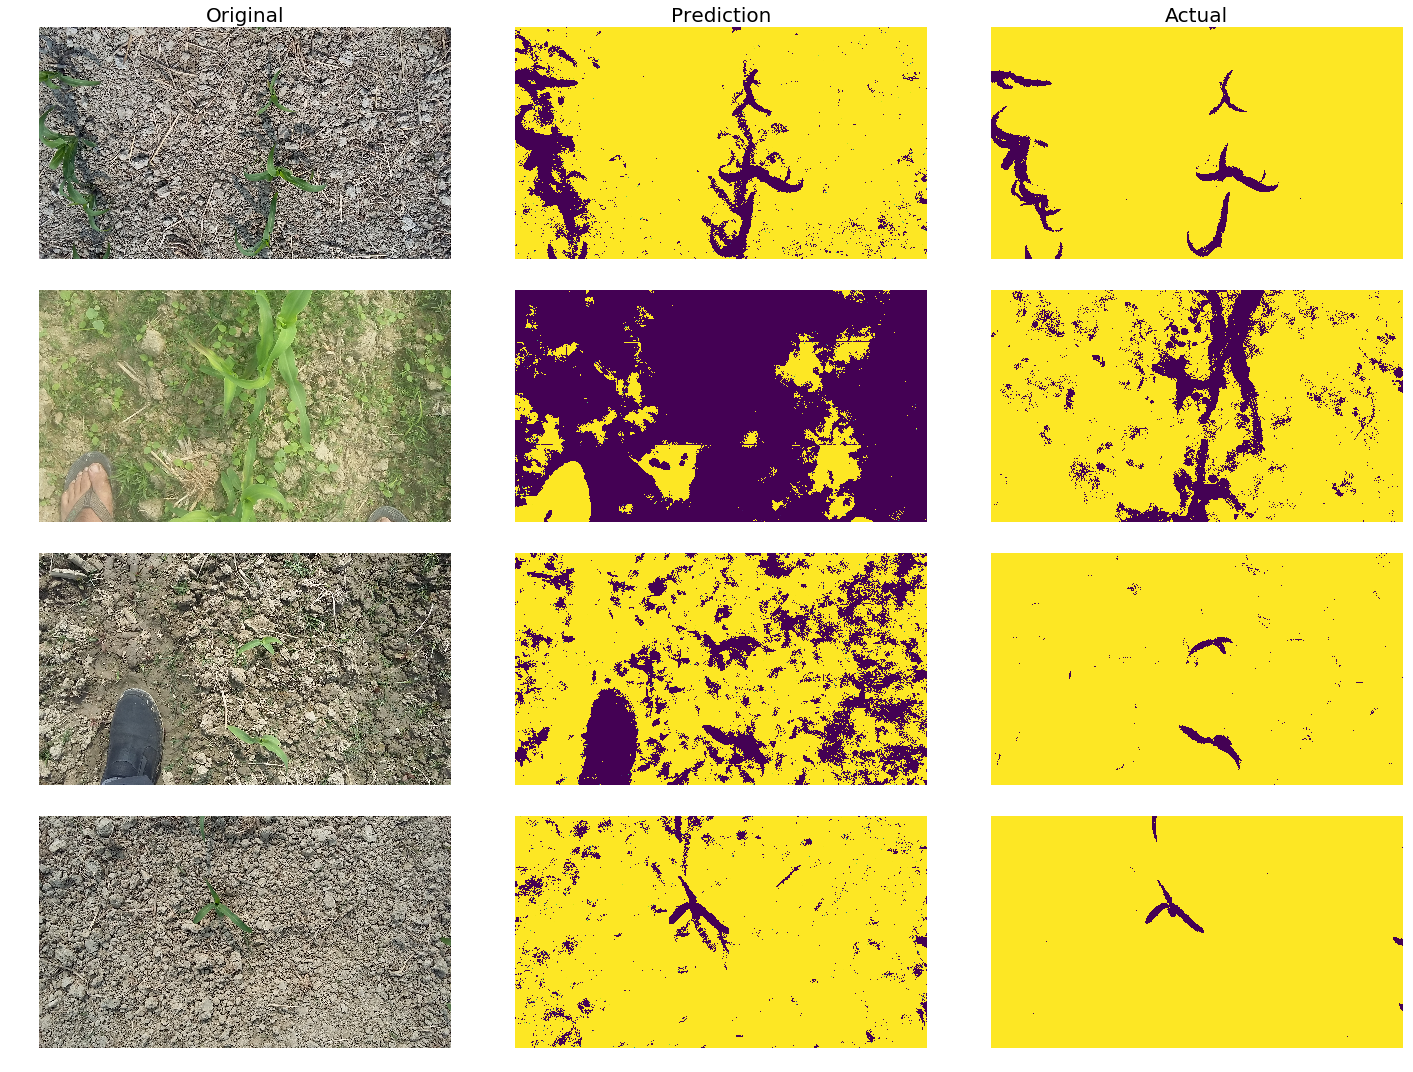

In [3]:
params = {
    'model' : '../../model_checkpoints/unet/unet_train_all_reshaped.hdf5',
    'train_path': '../../data/test',
    'num_of_img' : 4,
    'cutoff' : 0.5,
    'shape': (256,256)
}

plotPredictions(params)

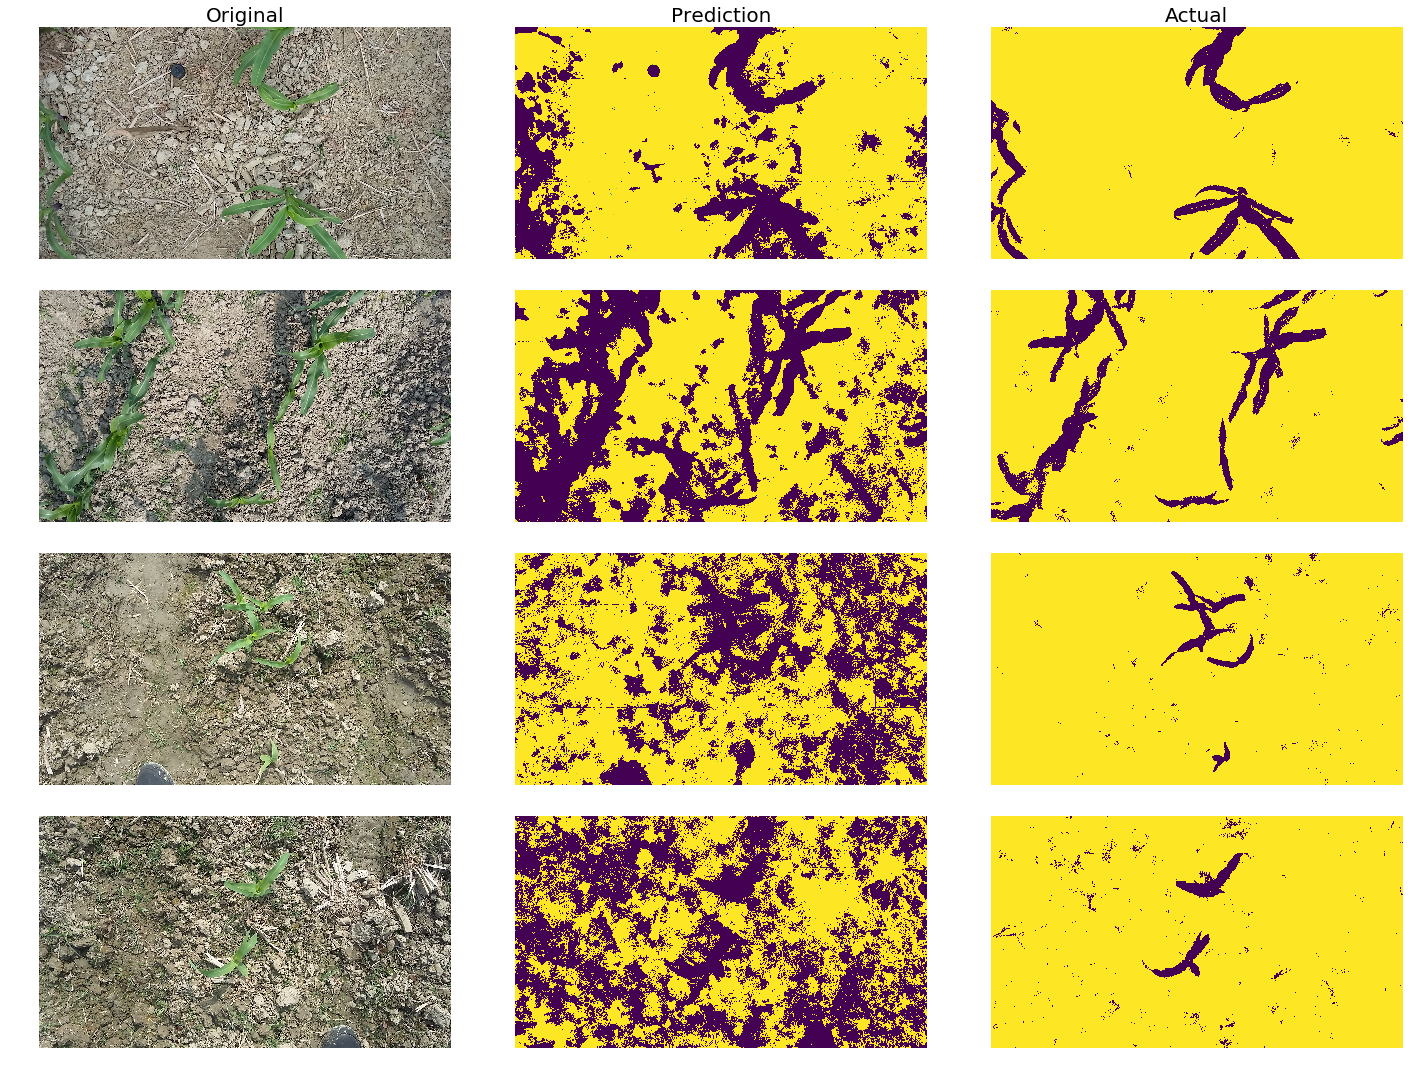

In [5]:
params = {
    'model' : '../../model_checkpoints/unet/unet_reshaped_dropout.hdf5',
    'train_path': '../../data/test',
    'num_of_img' : 4,
    'cutoff' : 0.5,
    'shape': (256,256)
}

plotPredictions(params)